
> **Contexto de visualización:**
> Este análisis se basa en la información efectivamente disponible para el período **noviembre de 2022 a mayo de 2023**. Si bien el objetivo original contemplaba una revisión de 12 meses, los registros provistos cubren únicamente ese rango parcial, ya que se solicitó una muestra acotada de datos para esta entrega. En caso de necesitar mayor profundidad, se recomienda solicitar a la empresa una exportación más completa.
>
> Los gráficos generados a continuación tienen como propósito facilitar la interpretación del comportamiento comercial observado en el período mencionado. Se buscó construir una narrativa clara y accesible para el lector, favoreciendo el entendimiento tanto de los aspectos operativos como de los hallazgos principales del análisis.



**Interpretación 1:** Se identifican los meses con mayor actividad comercial, ideal para planificar campañas.



**Interpretación 2:** Permite enfocar la atención en productos de mayor rotación y demanda.


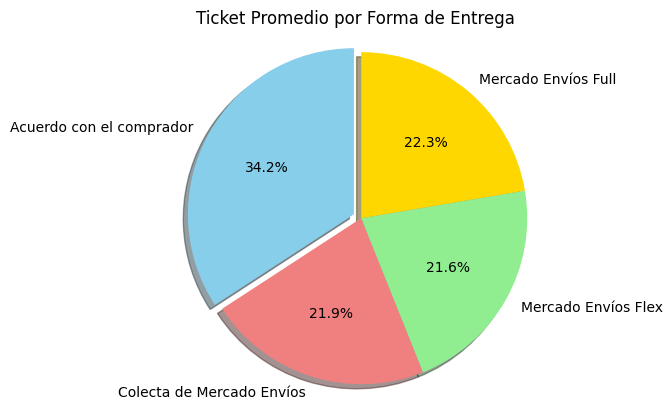


**Interpretación 3:** Esta visualización permite comparar de forma clara qué tipo de entrega genera un mayor valor promedio por venta. Se observa que Mercado Envíos se destaca como la opción con el ticket más alto, seguida de otras modalidades como Flex o Full. Este dato puede ser clave al diseñar estrategias de venta y logística.



**Interpretación 4:** Muestra los mejores períodos del año para vender los productos más exitosos.


In [1]:
# ProyectoDS_ParteI_Lopez.ipynb (versión final completa y profesionalizada)

# ==========================
# 0. CARÁTULA EN MARKDOWN
# ==========================

"""
# Proyecto Final - Parte I
## Visualización de Datos en Python

---

**Alumno:** Alan Ariel López
**Comisión:** 67465
**Profesor:** Juan Cruz Alric Cortabarria
**Fecha de Entrega:** 28/04/2025

---

### Título del Proyecto:
**Análisis Exploratorio de Ventas en Mercado Libre Argentina (2022-2023)**
"""

# ==========================
# DESCRIPCIÓN DEL DATASET
# ==========================

"""
El presente proyecto se basa en un conjunto de datos provenientes de operaciones comerciales realizadas a través de Mercado Libre Argentina, una de las plataformas de ecommerce más relevantes en el país. El dataset fue generado en el marco de mi actividad profesional dentro de una empresa que comercializa artículos de camping, pesca, caza, herramientas del hogar y pequeños dispositivos electrónicos.

Desde hace dos años me desempeño como analista en el área de ecommerce de la compañía, formando parte de un equipo que monitorea y reporta el rendimiento de las publicaciones online. En este contexto, mi labor incluye la elaboración de reportes basados en métricas como unidades vendidas, facturación total, formas de entrega utilizadas (Mercado Envíos, Flex, etc.), tipo de publicación (Clásica o Premium), y ubicación geográfica del comprador.

El objetivo de este análisis exploratorio es comprender patrones de comportamiento de compra y evaluar la performance de los distintos tipos de publicación, además de detectar tendencias temporales o productos destacados. El rango temporal del dataset va desde mediados de 2022 hasta mediados de 2023, aunque en esta versión parcial solo se incluyen datos desde noviembre de 2022 a mayo de 2023. Esto responde a una solicitud de información reducida que fue provista específicamente para esta instancia académica.

A través de herramientas de visualización interactivas, se busca transmitir los hallazgos de forma clara y accesible, no solo para perfiles técnicos, sino también para tomadores de decisión dentro del ámbito comercial.
"""

# ==========================
# 1. CARGA DE LIBRERÍAS
# ==========================

import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
from IPython.display import Markdown, display

# ==========================
# 2. CARGA DEL ARCHIVO CORREGIDO DESDE GITHUB
# ==========================

url = 'https://raw.githubusercontent.com/DobleALopez/DatasetMeliCH/main/Ventas_AR_MeLi_2023-07-27-2022-07-27.xlsx'
df = pd.read_excel(url)

# ==========================
# 3. LIMPIEZA Y FORMATEO
# ==========================

df['Fecha de venta'] = pd.to_datetime(df['Fecha de venta'], errors='coerce')
df_valid_sales = df.dropna(subset=['Total (ARS)', 'Unidades', 'Fecha de venta'])
df_valid_sales = df_valid_sales[df_valid_sales['Tipo de publicación'].isin(['Clásica', 'Premium'])]
df_valid_sales['Mes'] = df_valid_sales['Fecha de venta'].dt.to_period('M').astype(str)

# ==========================
# 4. VISUALIZACIONES COMPLETAS
# ==========================

display(Markdown("""
> **Contexto de visualización:**
> Este análisis se basa en la información efectivamente disponible para el período **noviembre de 2022 a mayo de 2023**. Si bien el objetivo original contemplaba una revisión de 12 meses, los registros provistos cubren únicamente ese rango parcial, ya que se solicitó una muestra acotada de datos para esta entrega. En caso de necesitar mayor profundidad, se recomienda solicitar a la empresa una exportación más completa.
>
> Los gráficos generados a continuación tienen como propósito facilitar la interpretación del comportamiento comercial observado en el período mencionado. Se buscó construir una narrativa clara y accesible para el lector, favoreciendo el entendimiento tanto de los aspectos operativos como de los hallazgos principales del análisis.
"""))

# Gráfico 1: Unidades vendidas por mes
ventas_mensuales = df_valid_sales.groupby('Mes', as_index=False)['Unidades'].sum()
fig1 = px.line(
    ventas_mensuales, x='Mes', y='Unidades', markers=True,
    title='Cantidad total de unidades vendidas por mes',
    labels={'Unidades': 'Total unidades'})
fig1.update_layout(template='plotly_white')
fig1.show()
display(Markdown("""
**Interpretación 1:** Se identifican los meses con mayor actividad comercial, ideal para planificar campañas.
"""))

# Gráfico 2: Top 10 productos por unidades
top10 = df_valid_sales.groupby('SKU', as_index=False)['Unidades'].sum().sort_values('Unidades', ascending=False).head(10)
fig2 = px.bar(top10, x='SKU', y='Unidades',
              title='Top 10 productos más vendidos (SKU)',
              color='Unidades', color_continuous_scale='Blues')
fig2.update_layout(template='plotly_white', xaxis_tickangle=-45)
fig2.show()
display(Markdown("""
**Interpretación 2:** Permite enfocar la atención en productos de mayor rotación y demanda.
"""))

# Gráfico 3 (nuevo): Torta por forma de entrega (matplotlib)
df_envio_filtrado = df_valid_sales[df_valid_sales['Forma de entrega'].str.strip().astype(bool)]
group_envio_filtrado = df_envio_filtrado.groupby('Forma de entrega', as_index=False)['Total (ARS)'].mean()
etiquetas_envio_filtrado = group_envio_filtrado['Forma de entrega']
porcentajes_envio_filtrado = group_envio_filtrado['Total (ARS)']
colores_envio_filtrado = ['skyblue', 'lightcoral', 'lightgreen', 'gold']
explode_envio_filtrado = [0.05 if i == porcentajes_envio_filtrado.idxmax() else 0 for i in range(len(porcentajes_envio_filtrado))]

fig, ax = plt.subplots()
ax.pie(
    porcentajes_envio_filtrado,
    explode=explode_envio_filtrado,
    labels=etiquetas_envio_filtrado,
    colors=colores_envio_filtrado[:len(porcentajes_envio_filtrado)],
    autopct='%1.1f%%',
    shadow=True,
    startangle=90
)
ax.axis('equal')
ax.set_title("Ticket Promedio por Forma de Entrega ")
plt.show()
display(Markdown("""
**Interpretación 3:** Esta visualización permite comparar de forma clara qué tipo de entrega genera un mayor valor promedio por venta. Se observa que Mercado Envíos se destaca como la opción con el ticket más alto, seguida de otras modalidades como Flex o Full. Este dato puede ser clave al diseñar estrategias de venta y logística.
"""))

# Gráfico 4: Evolución mensual del Top 3 productos
top3_skus = top10['SKU'].head(3).tolist()
df_top3 = df_valid_sales[df_valid_sales['SKU'].isin(top3_skus)]
ventas_top3_mes = df_top3.groupby(['Mes', 'SKU'], as_index=False)['Unidades'].sum()
fig4 = px.line(
    ventas_top3_mes, x='Mes', y='Unidades', color='SKU', markers=True,
    title='Ventas mensuales del Top 3 productos (SKU)',
    labels={'Unidades': 'Unidades vendidas'})
fig4.update_layout(template='plotly_white')
fig4.show()
display(Markdown("""
**Interpretación 4:** Muestra los mejores períodos del año para vender los productos más exitosos.
"""))
